In [1]:
from numpy import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import alsvinn_tools

import datetime
from plot_info import *
import socket
print("Generated on %s on %s" % (datetime.date.today(), socket.gethostname()))
errors=''
historic_date = '2018-12-01'

Generated on 2018-12-02 on galerkin


# Kelvin-Helmholtz

We run the Kelvin-Helmholtz instability for different resolutions

Remember that 2D FVM has a runtime of $$O(N^3)$$. We can not afford to allocate that many CPUs, so we always increase the amount of CPUs by a factor of 4, and measure the time per timestep

## With file output


core_counts['multix'] = [1, 4, 16, 64]
runtimes['multix'] = [143000, 287000, 626000, 1440000]
runtimes_per_timestep['multix'] = [6.16007581631774, 6.971264786611285, 8.17819583251682, 9.697492120787652]

core_counts['multiy'] = [1, 4, 16, 64]
runtimes['multiy'] = [145000, 326000, 780000, 1860000]
runtimes_per_timestep['multiy'] = [6.246230722839666, 6.670486167948928, 7.531211076673522, 8.746972653953772]

core_counts['multixmultiy'] = [1, 4, 16, 64]
runtimes['multixmultiy'] = [145000, 342000, 762000, 1612000]
runtimes_per_timestep['multixmultiy'] = [6.246230722839666, 7.180499275651389, 8.045952737946909, 8.493732447427906]



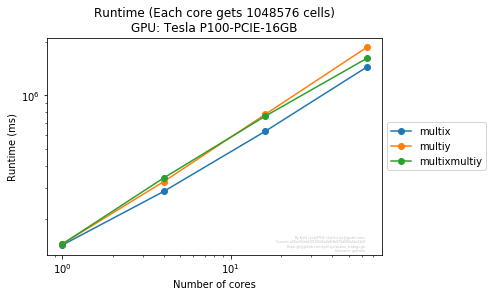

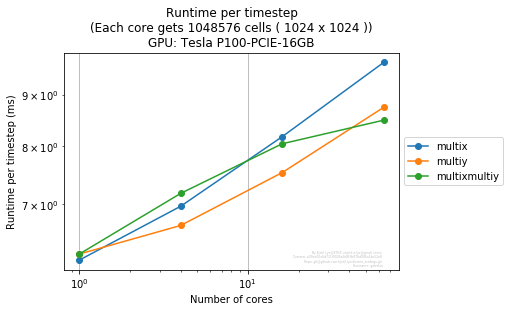

core_counts['multix'] = [1, 4, 16, 64]
runtimes['multix'] = [876000, 1627000, 3365000, 7356000]
runtimes_per_timestep['multix'] = [18.227595247508273, 19.253526460285904, 21.381913379422528, 24.6771109396491]

core_counts['multiy'] = [1, 4, 16, 64]
runtimes['multiy'] = [876000, 2035000, 4509000, 9206000]
runtimes_per_timestep['multiy'] = [18.227595247508273, 19.97016741575239, 20.57532421308169, 21.95077171054357]

core_counts['multixmultiy'] = [1, 4, 16, 64]
runtimes['multixmultiy'] = [876000, 1891000, 4080000, 9416000]
runtimes_per_timestep['multixmultiy'] = [18.227595247508273, 19.284505088824982, 20.3013355094242, 22.38419223399754]



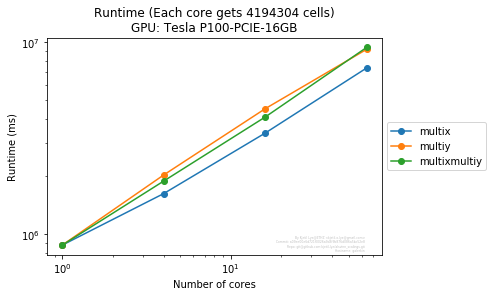

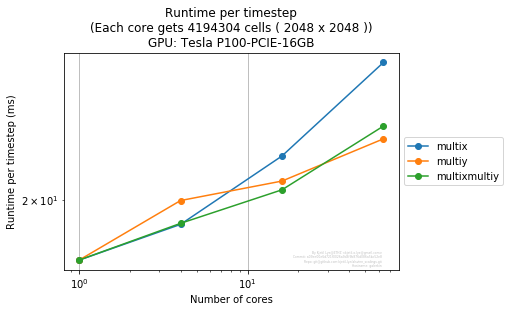

core_counts['multix'] = [1, 4, 16, 64]
runtimes['multix'] = [6481000, 12074000, 22188000, 43850000]
runtimes_per_timestep['multix'] = [65.16515006786989, 67.62781735896402, 69.34400100009375, 73.28523415342602]

core_counts['multiy'] = [1, 4, 16, 64]
runtimes['multiy'] = [6480000, 14276000, 31987000, 71770000]
runtimes_per_timestep['multiy'] = [65.15509526921723, 67.26854644149577, 68.5352982389983, 73.4056241165653]

core_counts['multixmultiy'] = [1, 4, 16, 64]
runtimes['multixmultiy'] = [6480000, 13581000, 27592000, 58420000]
runtimes_per_timestep['multixmultiy'] = [65.15509526921723, 66.71480782834237, 67.55889856860931, 68.89833426896061]



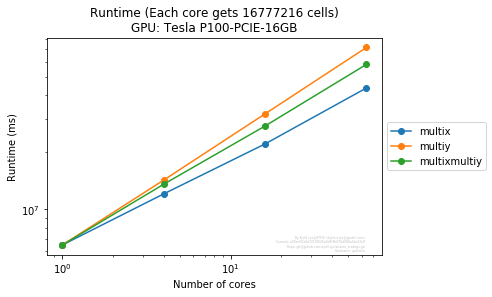

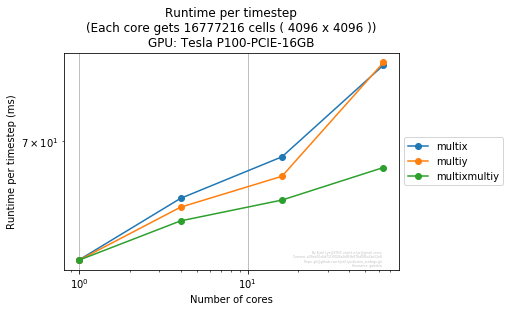

Git revision: 67d2b96dc2b329407bf8a48e4c1b2ee70724c679
revisions= ['67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96dc2b329407bf8a48e4c1b2ee70724c679', '67d2b96d

In [2]:
setups=['multix', 'multiy', 'multixmultiy']
build_types = []
revisions = []
min_runtime_timestep = None
max_runtime_timestep = None
base_Ns = [1024, 2048, 4096]
for base_N in base_Ns:
    for setup in setups:
        basename = '../historic_runs/daint_{historic_date}/base_{base_N}_{setup}/2d/weak_scaling/kelvinhelmholtz_{N}/alsuqcli_kh_{N}_report.json'

        resolutions = base_N * 2**arange(4)
        runtimes = []
        runtimes_per_timestep = []
        core_counts = []
        
        for resolution in resolutions:
            try:
                report = basename.format(N=resolution, setup = setup, historic_date = historic_date, base_N=base_N)
               
                git_revision = alsvinn_tools.get_revision(report)
                revisions.append(git_revision)
                build_types.append(alsvinn_tools.get_build_type(report))
                runtime = alsvinn_tools.get_runtime(report)
                runtimes.append(runtime)
                gpu = alsvinn_tools.get_gpu_name(report)
                cores = alsvinn_tools.get_total_cores(report)
                core_counts.append(cores)
                
                timesteps = alsvinn_tools.get_timesteps(report)
                runtimes_per_timestep.append(float(runtime)/timesteps)
            except Exception as e:
                errors +="Failed at resolution {N} with {setup}\n\n Skipping\n.".format(N=resolution, setup=setup)
                errors +=str(e) + '\n'
                print(e)
                raise e
        try:
            if len(runtimes) == 0:
                continue
            plt.figure(0)
            plt.title("Runtime (Each core gets %d cells)\nGPU: %s" % (resolutions[0]*resolutions[0], gpu))
            plt.loglog(core_counts, runtimes, '-o',label=setup)
            plt.xlabel('Number of cores')
            plt.ylabel('Runtime (ms)')
            ax = plt.gca()
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
            
            plt.figure(1)
            plt.title("Runtime per timestep\n(Each core gets %d cells ( %d x %d ))\nGPU: %s" % (resolutions[0]**2, resolutions[0], resolutions[0], gpu))
            plt.loglog(core_counts, runtimes_per_timestep, '-o',label=setup)
            if min_runtime_timestep is None:
                min_runtime_timestep = min(runtimes_per_timestep)
                max_runtime_timestep = max(runtimes_per_timestep)
            else:
                min_runtime_timestep = min(min_runtime_timestep, min(runtimes_per_timestep))
                max_runtime_timestep = max(max_runtime_timestep, max(runtimes_per_timestep))

            plt.xlabel('Number of cores')
            plt.ylabel('Runtime per timestep (ms)')
            plt.grid(True)
            ax = plt.gca()
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            print("core_counts['%s'] = %s" % (setup, core_counts))
            print("runtimes['%s'] = %s" % (setup, runtimes))
            print("runtimes_per_timestep['%s'] = %s" % (setup, runtimes_per_timestep))
            print("")
        except Exception as e:
            errors += "Failed at {setup}\n\n Skipping.".format(setup=setup) + '\n'
            errors += str(e) + '\n'
            raise e
    
    try:
        plt.figure(0)
        savePlot("weak_scaling_cuda_2d_runtime")
        plt.figure(1)
        savePlot("weak_scaling_cuda_2d_runtime_per_timestep")
        plt.show()
        plt.show()
    except Exception as e:
        errors+= str(e)+'\n'
        raise e
try:
   
    
    print("Git revision: %s" % git_revision )
    plt.show()
    print("revisions= %s" % revisions)
    print()
    print("build_types: %s" % build_types)
except Exception as e:
    errors+= str(e)+'\n'
    raise e

## Without file output


In [3]:
setups=['multix', 'multiy', 'multixmultiy']
build_types = []
revisions = []
for setup in setups:
    basename = '../runs/{setup}/2d/weak_scaling_without_write/kelvinhelmholtz_{N}/alsuqcli_kh_{N}_report.json'
    
    resolutions = [256, 512, 1024, 2048, 4096, 8192]
    runtimes = []
    runtimes_per_timestep = []
    core_counts = []
    for resolution in resolutions:
        try:
            report = basename.format(N=resolution, setup = setup)
            
            git_revision = alsvinn_tools.get_revision(report)
            revisions.append(git_revision)
            build_types.append(alsvinn_tools.get_build_type(report))
            runtime = alsvinn_tools.get_runtime(report)
            runtimes.append(runtime)
            
            cores = alsvinn_tools.get_total_cores(report)
            core_counts.append(cores)
            
            timesteps = alsvinn_tools.get_timesteps(report)
            runtimes_per_timestep.append(float(runtime)/timesteps)
        except Exception as e:
            errors += "Failed at resolution {N} with {setup}\n\n Skipping.\n".format(N=resolution, setup=setup)
            errors += str(e) + '\n'
            
    try:
        if len(runtimes) == 0:
            continue
        plt.figure(0)
        plt.title("Runtime (Each core gets %d cells)" % (resolutions[0]*resolutions[0]))
        plt.loglog(core_counts, runtimes, '-o',label=setup)
        plt.xlabel('Number of cores')
        plt.ylabel('Runtime (ms)')
        ax = plt.gca()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
        
        plt.figure(1)
        plt.title("Runtime per timestep (Each core gets %d cells)" % (resolutions[0]*resolutions[0]))
        plt.loglog(core_counts, runtimes_per_timestep, '-o',label=setup)
        plt.xlabel('Number of cores')
        plt.ylim([min(runtimes_per_timestep)/8.0, max(runtimes_per_timestep)*8.0])
        plt.title("Runtime per timestep (Each core gets %d cells)" % (resolutions[0]*resolutions[0]))
        
        ax = plt.gca()
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    except Exception as e:
        errors += "Failed at {setup}\n\n Skipping.\n".format(setup=setup)
        errors += str(e) + '\n'
    
    print("core_counts['%s'] = %s" % (setup, core_counts))
    print("runtimes['%s'] = %s" % (setup, runtimes))
    print("runtimes_per_timestep['%s'] = %s" % (setup, runtimes_per_timestep))
    print("")
try:
    print("Git revision: %s" % git_revision )
    plt.show()
    print("revisions= %s" % revisions)
    print()
    print("build_types: %s" % build_types)
except Exception as e:
    errors += str(e) + '\n'

Git revision: 67d2b96dc2b329407bf8a48e4c1b2ee70724c679
revisions= []

build_types: []


In [4]:
import os
cmakeCache = '../alsvinn/build/CMakeCache.txt'
if os.path.exists(cmakeCache):
    with open(cmakeCache, 'r') as f:
        print(f.read())

In [5]:
print(errors)

Failed at resolution 256 with multix

 Skipping.
[Errno 2] No such file or directory: '../runs/multix/2d/weak_scaling_without_write/kelvinhelmholtz_256/alsuqcli_kh_256_report.json'
Failed at resolution 512 with multix

 Skipping.
[Errno 2] No such file or directory: '../runs/multix/2d/weak_scaling_without_write/kelvinhelmholtz_512/alsuqcli_kh_512_report.json'
Failed at resolution 1024 with multix

 Skipping.
[Errno 2] No such file or directory: '../runs/multix/2d/weak_scaling_without_write/kelvinhelmholtz_1024/alsuqcli_kh_1024_report.json'
Failed at resolution 2048 with multix

 Skipping.
[Errno 2] No such file or directory: '../runs/multix/2d/weak_scaling_without_write/kelvinhelmholtz_2048/alsuqcli_kh_2048_report.json'
Failed at resolution 4096 with multix

 Skipping.
[Errno 2] No such file or directory: '../runs/multix/2d/weak_scaling_without_write/kelvinhelmholtz_4096/alsuqcli_kh_4096_report.json'
Failed at resolution 8192 with multix

 Skipping.
[Errno 2] No such file or directory: